PEDRO0 ANGELO MARTINS

Considerando a base de dados Titanic (https://www.kaggle.com/datasets/yasserh/titanicdataset):

1. Aplicar a separação do conjunto treino (com 70%) e teste (30%);
 * Classificadores: serão utilizados os classificadores Decision Tree,
 * Random Forest, KNN e Redes Neurais (biliotecas scikit-learn e Keras).

2. Etapas do processo:

 * Limpeza e pré-processamento dos dados(Remoção de dados faltantes NaN,
   transformação de dados categóricos e normalização);
 * Balanceamento das classes;
 * Comparação com todos os classificadores descritos anteriormente;
 * Ajuste dos hiperparâmetros com GridSearchCV e RandonSearchCV;
 * Amostragem por validação cruzada estratificada (10 folds);
 * Apresentação da Acurácia nos conjuntos treino (10 folds) e também conjunto
   teste;
 * Apresentação da Matriz confusão;

## Tratamento de dados para o Titanic Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import statistics  as sts
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Carregar os dados do arquivo CSV
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df.drop(["Ticket","Name","PassengerId"],axis=1)

In [ ]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  891
Colunas:  9

Atributos : 
 ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

Valores faltantes :   866

Valores únicos :  
 Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Ver inconsistências no preenchimento dos dados
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Tentativa para preencher dados de idade com a mediana (funcionou)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]

In [ ]:
#Utlizando moda para sanar o problema com "Embarked" (funcionou)
mode_value = sts.mode(df['Embarked'])
df['Embarked'].fillna(mode_value, inplace=True)
df = pd.get_dummies(data=df, columns=['Embarked'])

In [ ]:
#Binarizando "Pclass"
df = pd.get_dummies(data=df, columns=['Pclass'])

In [ ]:
# Guarda uma cópia do data frame, para a realização do segundo teste,
# sem a classe "Cabin".
df_re_teste = df.copy()

In [ ]:
#Método de tratamento da coluna "Cabin", que cria uma cópia
# do data frame, filtra toda a base de dados com NaN nas cabines
# e calcula a moda entre elas, armazenando o resultado numa variavel.
dfa = df.copy()
dfa.dropna(subset=['Cabin'], inplace=True)
dfa['Cabin'] = df['Cabin'].str[0]
mode_value = sts.mode(dfa['Cabin'])
print(mode_value)

C


In [ ]:
#Aplicando a moda presente em cabin, e preeenchendo nos campos faltantes
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].fillna(mode_value, inplace=True)
df = pd.get_dummies(data=df, columns=['Cabin'])

In [ ]:
#Transformando a coluna "Sex" em numérico (note que,
# devido a natureza da coluna, seus dados se comportarão
# de forma binária).
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[["Sex"]] = \
df[["Sex"]].apply(labelencoder.fit_transform)

In [ ]:
#Ver inconsistências no preenchimento dos dados
df.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Pclass_1    891 non-null    uint8  
 10  Pclass_2    891 non-null    uint8  
 11  Pclass_3    891 non-null    uint8  
 12  Cabin_A     891 non-null    uint8  
 13  Cabin_B     891 non-null    uint8  
 14  Cabin_C     891 non-null    uint8  
 15  Cabin_D     891 non-null    uint8  
 16  Cabin_E     891 non-null    uint8  
 17  Cabin_F     891 non-null    uint8  
 18  Cabin_G     891 non-null    uint8  
 19  Cabin_T     891 non-null    u

In [ ]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,0,1,0,1,0,0,0,1,0,0,0,0,0
887,1,0,19.0,0,0,30.0000,0,0,1,1,0,0,0,1,0,0,0,0,0,0
888,0,0,28.0,1,2,23.4500,0,0,1,0,0,1,0,0,1,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
#mulheres = 0 ; homens = 1
df["Sex"].value_counts()


1    577
0    314
Name: Sex, dtype: int64

In [ ]:
#Normalização de Age e Fare, que possuem discrepância alta em distribuição de dados.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [ ]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,1,0.271174,1,0,0.014151,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0.472229,1,0,0.139136,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0.321438,0,0,0.015469,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0.434531,1,0,0.103644,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0.434531,0,0,0.015713,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0.334004,0,0,0.025374,0,0,1,0,1,0,0,0,1,0,0,0,0,0
887,1,0,0.233476,0,0,0.058556,0,0,1,1,0,0,0,1,0,0,0,0,0,0
888,0,0,0.346569,1,2,0.045771,0,0,1,0,0,1,0,0,1,0,0,0,0,0
889,1,1,0.321438,0,0,0.058556,1,0,0,1,0,0,0,0,1,0,0,0,0,0


## Distribuição e balanceamento


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
# Dividir os dados em conjunto de treinamento e teste (70 - 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Aplicar balanceamento nas classes usando SMOTE
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
print(X_train_oversampled.shape)
print(X_train.shape)

(786, 19)
(623, 19)


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Dividir os dados em conjunto de treinamento e teste (70 - 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Aplicar balanceamento nas classes usando SMOTE
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_train_oversampled.shape)
print(X_train.shape)

(760, 19)
(623, 19)


## Decision Tree


In [ ]:
# Inicializando variavel para manipular
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train_oversampled, y_train_oversampled)

In [ ]:
# The predictions are stored in X_pred
y_pred = clf.predict(X_test)

In [ ]:
y_proba = clf.predict_proba(X_test)

In [ ]:
print(clf.feature_importances_)

[0.27454083 0.25572275 0.03908089 0.01665965 0.25918659 0.01172377
 0.         0.00433209 0.00169243 0.02122181 0.08004934 0.01441439
 0.01098807 0.00646314 0.         0.0035959  0.00032836 0.
 0.        ]


In [ ]:
print(clf.feature_names_in_)

['Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'Pclass_1' 'Pclass_2' 'Pclass_3' 'Cabin_A' 'Cabin_B' 'Cabin_C' 'Cabin_D'
 'Cabin_E' 'Cabin_F' 'Cabin_G' 'Cabin_T']


In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred)
confusion_tree = confusion_matrix(y_test, y_pred)
print("Acurácia do modelo de árvore de decisão:", accuracy_tree)
print("Matriz confusao:")
print(confusion_tree)

Acurácia do modelo de árvore de decisão: 0.7649253731343284
Matriz confusao:
[[141  28]
 [ 35  64]]


GridSearch

In [ ]:
# Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_oversampled, y_train_oversampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Melhores hiperparâmetros encontrados através do Grid Search:")
print(best_params)
print("Melhor pontuação (acurácia) encontrada através do Grid Search:", best_score)

Melhores hiperparâmetros encontrados através do Grid Search:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação (acurácia) encontrada através do Grid Search: 0.8368421052631578


In [ ]:
# Cross Validation com Grid Search
grid_scores = cross_val_score(grid_search.best_estimator_, X_train_oversampled, y_train_oversampled, cv=10)
Acurácias_Tree_Grid = np.mean(grid_scores)
print("Média das acurácias alcançadas no Cross Validation com Grid Search:", np.mean(grid_scores))

Média das acurácias alcançadas no Cross Validation com Grid Search: 0.8355263157894737


Random Search

In [ ]:
# Random Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, cv=10)
random_search.fit(X_train_oversampled, y_train_oversampled)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Melhores hiperparâmetros encontrados através do Random Search:")
print(best_params)
print("Melhor pontuação (acurácia) encontrada através do Random Search:", best_score)

Melhores hiperparâmetros encontrados através do Random Search:
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}
Melhor pontuação (acurácia) encontrada através do Random Search: 0.8249999999999998


In [ ]:
# Cross Validation com Random Search
random_scores = cross_val_score(random_search.best_estimator_, X_train_oversampled, y_train_oversampled, cv=10)
Acurácias_Tree_Random = np.mean(random_scores)
print("Média das acurácias alcançadas no Cross Validation com Random Search:", np.mean(random_scores))

Média das acurácias alcançadas no Cross Validation com Random Search: 0.8263157894736841


## KNN


In [ ]:
#Treinar o classificador KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_oversampled, y_train_oversampled)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cm_knn = confusion_matrix(y_test,pred)
print(cm_knn)
print(classification_report(y_test,pred))

[[128  41]
 [ 36  63]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       169
           1       0.61      0.64      0.62        99

    accuracy                           0.71       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.72      0.71      0.71       268



In [ ]:
acuracia_knn = accuracy_score(y_test, pred)

In [ ]:
# Inicialização do classificador KNN
knn = KNeighborsClassifier()


GridSearch

In [ ]:
# Grid Search
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
g_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
g_search.fit(X_train_oversampled, y_train_oversampled)

best_params_grid = g_search.best_params_
best_score_grid = g_search.best_score_

print("Melhores hiperparâmetros Grid Search:")
print(best_params_grid)
print("Melhor pontuação (acurácia) Grid Search:", best_score_grid)

Melhores hiperparâmetros Grid Search:
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Melhor pontuação (acurácia) Grid Search: 0.8355263157894737


In [ ]:
# Carrega todos os dados do GridSearch em um Dataframe
g_results =  pd.DataFrame(g_search.cv_results_)
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
knn_grid = g_results.loc[g_search.best_index_,'mean_test_score']
print(knn_grid)

0.8355263157894737


RandomSearch

In [ ]:
# Random Search
param_dist = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

r_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, cv=10)
r_search.fit(X_train_oversampled, y_train_oversampled)

best_params_random = r_search.best_params_
best_score_random = r_search.best_score_

print("Melhores hiperparâmetros Random Search:")
print(best_params_random)
print("Melhor pontuação (acurácia) Random Search:", best_score_random)


Melhores hiperparâmetros Random Search:
{'weights': 'uniform', 'p': 2, 'n_neighbors': 3}
Melhor pontuação (acurácia) Random Search: 0.8342105263157894


In [ ]:
# Carrega todos os dados do GridSearch em um Dataframe
r_results =  pd.DataFrame(r_search.cv_results_)
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
knn_random = r_results.loc[r_search.best_index_,'mean_test_score']
print(knn_random)

0.8342105263157894


## Random Forest


In [ ]:
# Treinar o classificador Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliar o desempenho do classificador Random Forest
forest_score = forest.score(X_train_oversampled, y_train_oversampled)
forest_test = forest.score(X_test, y_test)
y_pred_forest = forest.predict(X_test)
cm_forest = confusion_matrix(y_test, y_pred_forest)

In [ ]:
# Exibir os resultados
print('Random Forest:')
print('Training Score:', forest_score)
print('Testing Score:', forest_test)
print('Confusion Matrix:\n', cm_forest)

Random Forest:
Training Score: 0.9881578947368421
Testing Score: 0.7649253731343284
Confusion Matrix:
 [[141  28]
 [ 35  64]]


In [ ]:
forest = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

In [ ]:
# cria o objeto g_search
g_search = GridSearchCV(estimator = forest, param_grid = param_grid,
                        refit=True, scoring='accuracy', cv = 10)

In [ ]:
# Faz o treinamento
g_search.fit(X_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 60}


In [ ]:
# Carrega todos os dados do GridSearch em um Dataframe
g_results =  pd.DataFrame(g_search.cv_results_)
g_search.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
forest_grid = g_results.loc[g_search.best_index_,'mean_test_score']
print(forest_grid)

0.843421052631579


In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = g_search.best_estimator_
model.score(X_test,y_test)

0.7723880597014925

RandomSearchCV

In [ ]:
# cria o objeto r_search
r_search = RandomizedSearchCV(estimator = forest, param_distributions = param_grid,
                        n_iter= 10, cv = 10, return_train_score=True)

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
# Faz o treinamento
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

{'n_estimators': 60, 'max_features': 'log2', 'criterion': 'gini'}


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
forest_random = r_search.cv_results_['mean_test_score'][r_search.best_index_]
print(forest_random)

0.8328947368421054


In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = r_search.best_estimator_
model.score(X_test,y_test)

0.7723880597014925

## Rede Neural (Scikit) - 1 camada


REDE NEURAL SCIKIT - 1 CAMADA

In [ ]:
from sklearn.neural_network import MLPClassifier
rna = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', solver='sgd', max_iter=1000,
                    tol=0.0001, random_state=3, verbose=True)

In [ ]:
rna.fit(X_train_oversampled, y_train_oversampled)

Iteration 1, loss = 0.70811314
Iteration 2, loss = 0.70779564
Iteration 3, loss = 0.70727795
Iteration 4, loss = 0.70671937
Iteration 5, loss = 0.70605760
Iteration 6, loss = 0.70537506
Iteration 7, loss = 0.70471013
Iteration 8, loss = 0.70399217
Iteration 9, loss = 0.70329075
Iteration 10, loss = 0.70260582
Iteration 11, loss = 0.70197382
Iteration 12, loss = 0.70134424
Iteration 13, loss = 0.70064070
Iteration 14, loss = 0.70001321
Iteration 15, loss = 0.69938523
Iteration 16, loss = 0.69882038
Iteration 17, loss = 0.69818148
Iteration 18, loss = 0.69761449
Iteration 19, loss = 0.69701386
Iteration 20, loss = 0.69643609
Iteration 21, loss = 0.69586792
Iteration 22, loss = 0.69528799
Iteration 23, loss = 0.69468313
Iteration 24, loss = 0.69406001
Iteration 25, loss = 0.69350887
Iteration 26, loss = 0.69295252
Iteration 27, loss = 0.69236209
Iteration 28, loss = 0.69178408
Iteration 29, loss = 0.69123900
Iteration 30, loss = 0.69070662
Iteration 31, loss = 0.69018766
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoes = rna.predict(X_test)

In [ ]:
rna_teste = accuracy_score(y_test, previsoes)

In [ ]:
print(rna_teste)

0.7276119402985075


In [ ]:
cm_rna_teste = confusion_matrix(y_test, previsoes)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       169
           1       0.61      0.72      0.66        99

    accuracy                           0.73       268
   macro avg       0.71      0.73      0.72       268
weighted avg       0.74      0.73      0.73       268



In [ ]:
previsoes_treino = rna.predict(X_train_oversampled)

In [ ]:
rna_treino = accuracy_score(y_train_oversampled, previsoes_treino)

In [ ]:
cm_rna_treino = confusion_matrix(y_train_oversampled, previsoes_treino)

GridSearch

In [ ]:
# Grid Search
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

g_search = GridSearchCV(estimator=rna, param_grid=param_grid, cv=10)
g_search.fit(X_train_oversampled, y_train_oversampled)

best_params_grid = g_search.best_params_
best_score_grid = g_search.best_score_

print("Melhores hiperparâmetros encontrados através do Grid Search:")
print(best_params_grid)
print("Melhor pontuação (acurácia) encontrada através do Grid Search:", best_score_grid)


A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 559, loss = 0.42903897
Iteration 560, loss = 0.42893093
Iteration 561, loss = 0.42884357
Iteration 562, loss = 0.42871120
Iteration 563, loss = 0.42860910
Iteration 564, loss = 0.42851204
Iteration 565, loss = 0.42840491
Iteration 566, loss = 0.42829176
Iteration 567, loss = 0.42819392
Iteration 568, loss = 0.42807726
Iteration 569, loss = 0.42798807
Iteration 570, loss = 0.42787385
Iteration 571, loss = 0.42778170
Iteration 572, loss = 0.42770481
Iteration 573, loss = 0.42759068
Iteration 574, loss = 0.42749812
Iteration 575, loss = 0.42739982
Iteration 576, loss = 0.42732154
Iteration 577, loss = 0.42721431
Iteration 578, loss = 0.42710931
Iteration 579, loss = 0.42700288
Iteration 580, loss = 0.42689798
Iteration 581, loss = 0.42679535
Iteration 582, loss = 0.42670491
Iteration 583, loss = 0.42659154
Iteration 584, loss = 0.42652455
Iteration 585, loss = 0.42640744
Iteration 586, loss = 0.42630599
Iteration 587, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna_best_grid = MLPClassifier(**best_params_grid)
rna_best_grid.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Grid Search
pred_grid = rna_best_grid.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_grid = accuracy_score(y_test, pred_grid)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search:", accuracy_grid)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search: 0.7649253731343284


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Grid Search
print("Matriz de Confusão - Grid Search")
cm_rna_grid = confusion_matrix(y_test, pred_grid)

Matriz de Confusão - Grid Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna1_grid = g_results.loc[g_search.best_index_,'mean_test_score']

RandomSearch

In [ ]:
# Random Search
param_dist = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

r_search = RandomizedSearchCV(estimator=rna, param_distributions=param_dist, cv=10)
r_search.fit(X_train_oversampled, y_train_oversampled)

best_params_random = r_search.best_params_
best_score_random = r_search.best_score_

print("Melhores hiperparâmetros encontrados através do Random Search:")
print(best_params_random)
print("Melhor pontuação (acurácia) encontrada através do Random Search:", best_score_random)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 283, loss = 0.59306934
Iteration 284, loss = 0.59256638
Iteration 285, loss = 0.59208252
Iteration 286, loss = 0.59158224
Iteration 287, loss = 0.59109537
Iteration 288, loss = 0.59057768
Iteration 289, loss = 0.59009046
Iteration 290, loss = 0.58958766
Iteration 291, loss = 0.58908327
Iteration 292, loss = 0.58857236
Iteration 293, loss = 0.58808006
Iteration 294, loss = 0.58755871
Iteration 295, loss = 0.58707761
Iteration 296, loss = 0.58657174
Iteration 297, loss = 0.58608529
Iteration 298, loss = 0.58556143
Iteration 299, loss = 0.58508170
Iteration 300, loss = 0.58456542
Iteration 301, loss = 0.58405704
Iteration 302, loss = 0.58357538
Iteration 303, loss = 0.58305688
Iteration 304, loss = 0.58254906
Iteration 305, loss = 0.58206087
Iteration 306, loss = 0.58154784
Iteration 307, loss = 0.58105251
Iteration 308, loss = 0.58056094
Iteration 309, loss = 0.58007386
Iteration 310, loss = 0.57956306
Iteration 311, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna_best_random = MLPClassifier(**best_params_random)
rna_best_random.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Random Search
pred_random = rna_best_random.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_random = accuracy_score(y_test, pred_random)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search:", accuracy_random)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search: 0.7649253731343284


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Random Search
print("Matriz de Confusão - Random Search")
cm_rna_random = confusion_matrix(y_test, pred_random)

Matriz de Confusão - Random Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna1_random = r_results.loc[r_search.best_index_,'mean_test_score']

## Rede Neural (Scikit) - 2 camadas


In [ ]:
rna2 = MLPClassifier(hidden_layer_sizes=(3,3), activation='relu', solver='sgd', max_iter =1000,
                              tol=0.0001, random_state = 3, verbose = True)

In [ ]:
rna2.fit(X_train_oversampled, y_train_oversampled)

Iteration 1, loss = 0.81105531
Iteration 2, loss = 0.80990128
Iteration 3, loss = 0.80815600
Iteration 4, loss = 0.80606531
Iteration 5, loss = 0.80366632
Iteration 6, loss = 0.80117983
Iteration 7, loss = 0.79861464
Iteration 8, loss = 0.79609273
Iteration 9, loss = 0.79355391
Iteration 10, loss = 0.79099263
Iteration 11, loss = 0.78840054
Iteration 12, loss = 0.78584426
Iteration 13, loss = 0.78346353
Iteration 14, loss = 0.78110317
Iteration 15, loss = 0.77874012
Iteration 16, loss = 0.77632135
Iteration 17, loss = 0.77410531
Iteration 18, loss = 0.77184272
Iteration 19, loss = 0.76964690
Iteration 20, loss = 0.76752217
Iteration 21, loss = 0.76537005
Iteration 22, loss = 0.76339980
Iteration 23, loss = 0.76134291
Iteration 24, loss = 0.75926013
Iteration 25, loss = 0.75735537
Iteration 26, loss = 0.75554467
Iteration 27, loss = 0.75358030
Iteration 28, loss = 0.75177958
Iteration 29, loss = 0.74995433
Iteration 30, loss = 0.74819515
Iteration 31, loss = 0.74649678
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoes2 = rna2.predict(X_test)

In [ ]:
rna2_teste = accuracy_score(y_test, previsoes2)

In [ ]:
print(rna2_teste)

0.7723880597014925


In [ ]:
cm_rna2_teste = confusion_matrix(y_test, previsoes2)

In [ ]:
print(classification_report(y_test, previsoes2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       169
           1       0.70      0.67      0.68        99

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
previsoes_treino2 = rna2.predict(X_train_oversampled)

In [ ]:
rna2_treino = accuracy_score(y_train_oversampled, previsoes_treino2)

In [ ]:
cm_rna2_treino = confusion_matrix(y_train_oversampled, previsoes_treino2)

GridSearch

In [ ]:
# Grid Search
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

g_search = GridSearchCV(estimator=rna2, param_grid=param_grid, cv=10)
g_search.fit(X_train_oversampled, y_train_oversampled)

best_params_grid2 = g_search.best_params_
best_score_grid2 = g_search.best_score_

print("Melhores hiperparâmetros encontrados através do Grid Search:")
print(best_params_grid2)
print("Melhor pontuação (acurácia) encontrada através do Grid Search:", best_score_grid2)


A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 247, loss = 0.56346102
Iteration 248, loss = 0.56254016
Iteration 249, loss = 0.56157539
Iteration 250, loss = 0.56065497
Iteration 251, loss = 0.55966122
Iteration 252, loss = 0.55872129
Iteration 253, loss = 0.55778043
Iteration 254, loss = 0.55681335
Iteration 255, loss = 0.55589612
Iteration 256, loss = 0.55497291
Iteration 257, loss = 0.55400158
Iteration 258, loss = 0.55306000
Iteration 259, loss = 0.55212939
Iteration 260, loss = 0.55120276
Iteration 261, loss = 0.55020712
Iteration 262, loss = 0.54929448
Iteration 263, loss = 0.54833807
Iteration 264, loss = 0.54739058
Iteration 265, loss = 0.54648054
Iteration 266, loss = 0.54550055
Iteration 267, loss = 0.54458424
Iteration 268, loss = 0.54365022
Iteration 269, loss = 0.54272918
Iteration 270, loss = 0.54180953
Iteration 271, loss = 0.54089530
Iteration 272, loss = 0.54005650
Iteration 273, loss = 0.53908898
Iteration 274, loss = 0.53817226
Iteration 275, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna2_best_grid = MLPClassifier(**best_params_grid2)
rna2_best_grid.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Grid Search
pred_grid2 = rna2_best_grid.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_grid = accuracy_score(y_test, pred_grid2)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search:", accuracy_grid)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search: 0.75


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Grid Search
print("Matriz de Confusão - Grid Search")
cm_rna2_grid = confusion_matrix(y_test, pred_grid2)

Matriz de Confusão - Grid Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna2_grid = g_results.loc[g_search.best_index_,'mean_test_score']

RandomSearch

In [ ]:
# Random Search
param_dist = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

r_search = RandomizedSearchCV(estimator=rna2, param_distributions=param_dist, cv=10)
r_search.fit(X_train_oversampled, y_train_oversampled)

best_params_random = r_search.best_params_
best_score_random = r_search.best_score_

print("Melhores hiperparâmetros encontrados através do Random Search:")
print(best_params_random)
print("Melhor pontuação (acurácia) encontrada através do Random Search:", best_score_random)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 113, loss = 0.50057150
Iteration 114, loss = 0.49909149
Iteration 115, loss = 0.49768672
Iteration 116, loss = 0.49630148
Iteration 117, loss = 0.49499132
Iteration 118, loss = 0.49364595
Iteration 119, loss = 0.49234540
Iteration 120, loss = 0.49102917
Iteration 121, loss = 0.48972598
Iteration 122, loss = 0.48848662
Iteration 123, loss = 0.48724503
Iteration 124, loss = 0.48594885
Iteration 125, loss = 0.48476129
Iteration 126, loss = 0.48355621
Iteration 127, loss = 0.48239961
Iteration 128, loss = 0.48126069
Iteration 129, loss = 0.48017980
Iteration 130, loss = 0.47906952
Iteration 131, loss = 0.47793834
Iteration 132, loss = 0.47688976
Iteration 133, loss = 0.47587132
Iteration 134, loss = 0.47488583
Iteration 135, loss = 0.47376425
Iteration 136, loss = 0.47271411
Iteration 137, loss = 0.47176556
Iteration 138, loss = 0.47074834
Iteration 139, loss = 0.46981088
Iteration 140, loss = 0.46880300
Iteration 141, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna2_best_random = MLPClassifier(**best_params_random)
rna2_best_random.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Random Search
pred_random2 = rna2_best_random.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_random = accuracy_score(y_test, pred_random2)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search:", accuracy_random)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search: 0.7611940298507462


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Random Search
print("Matriz de Confusão - Random Search")
cm_rna2_random = confusion_matrix(y_test, pred_random2)

Matriz de Confusão - Random Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna2_random = r_results.loc[r_search.best_index_,'mean_test_score']

## Rede Neural (Scikit) - 3 camadas


In [ ]:
rna3 = MLPClassifier(hidden_layer_sizes=(3,3, 3), activation='relu', solver='sgd', max_iter =100,
                              tol=0.0001, random_state = 3, verbose = True)

In [ ]:
rna3.fit(X_train_oversampled, y_train_oversampled)

Iteration 1, loss = 0.71485857
Iteration 2, loss = 0.71467110
Iteration 3, loss = 0.71435316
Iteration 4, loss = 0.71401184
Iteration 5, loss = 0.71360826
Iteration 6, loss = 0.71318709
Iteration 7, loss = 0.71275256
Iteration 8, loss = 0.71238837
Iteration 9, loss = 0.71188757
Iteration 10, loss = 0.71148940
Iteration 11, loss = 0.71111371
Iteration 12, loss = 0.71073823
Iteration 13, loss = 0.71029859
Iteration 14, loss = 0.70992359
Iteration 15, loss = 0.70953323
Iteration 16, loss = 0.70921348
Iteration 17, loss = 0.70887219
Iteration 18, loss = 0.70848628
Iteration 19, loss = 0.70815813
Iteration 20, loss = 0.70785125
Iteration 21, loss = 0.70752390
Iteration 22, loss = 0.70726086
Iteration 23, loss = 0.70692093
Iteration 24, loss = 0.70661867
Iteration 25, loss = 0.70636358
Iteration 26, loss = 0.70605827
Iteration 27, loss = 0.70581300
Iteration 28, loss = 0.70552894
Iteration 29, loss = 0.70527824
Iteration 30, loss = 0.70503388
Iteration 31, loss = 0.70479254
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=100, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoes3 = rna3.predict(X_test)

In [ ]:
rna3_teste = accuracy_score(y_test, previsoes3)

In [ ]:
print(rna3_teste)

0.6082089552238806


In [ ]:
cm_rna3_teste = confusion_matrix(y_test, previsoes3)

In [ ]:
print(classification_report(y_test, previsoes3))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       169
           1       0.36      0.08      0.13        99

    accuracy                           0.61       268
   macro avg       0.50      0.50      0.44       268
weighted avg       0.53      0.61      0.52       268



In [ ]:
previsoes_treino3 = rna3.predict(X_train_oversampled)

In [ ]:
rna3_treino = accuracy_score(y_train_oversampled, previsoes_treino3)

In [ ]:
cm_rna3_treino = confusion_matrix(y_train_oversampled, previsoes_treino3)

GridSearch

In [ ]:
# Grid Search 3
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

g_search = GridSearchCV(estimator=rna3, param_grid=param_grid, cv=10)
g_search.fit(X_train_oversampled, y_train_oversampled)

best_params_grid3 = g_search.best_params_
best_score_grid3 = g_search.best_score_

print("Melhores hiperparâmetros encontrados através do Grid Search:")
print(best_params_grid3)
print("Melhor pontuação (acurácia) encontrada através do Grid Search:", best_score_grid3)


A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 345, loss = 0.38244376
Iteration 346, loss = 0.38221742
Iteration 347, loss = 0.38200876
Iteration 348, loss = 0.38176592
Iteration 349, loss = 0.38179097
Iteration 350, loss = 0.38146889
Iteration 351, loss = 0.38132825
Iteration 352, loss = 0.38108295
Iteration 353, loss = 0.38100353
Iteration 354, loss = 0.38085568
Iteration 355, loss = 0.38106170
Iteration 356, loss = 0.38065721
Iteration 357, loss = 0.38032376
Iteration 358, loss = 0.38020946
Iteration 359, loss = 0.38025530
Iteration 360, loss = 0.37999445
Iteration 361, loss = 0.37960933
Iteration 362, loss = 0.37957039
Iteration 363, loss = 0.37947003
Iteration 364, loss = 0.37964045
Iteration 365, loss = 0.37946092
Iteration 366, loss = 0.37915244
Iteration 367, loss = 0.37909945
Iteration 368, loss = 0.37869767
Iteration 369, loss = 0.37858744
Iteration 370, loss = 0.37843425
Iteration 371, loss = 0.37828115
Iteration 372, loss = 0.37810981
Iteration 373, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna3_best_grid = MLPClassifier(**best_params_grid3)
rna3_best_grid.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Grid Search
pred_grid3 = rna3_best_grid.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_grid = accuracy_score(y_test, pred_grid3)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search:", accuracy_grid)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search: 0.7649253731343284


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Grid Search
print("Matriz de Confusão - Grid Search")
cm_rna3_grid = confusion_matrix(y_test, pred_grid3)

Matriz de Confusão - Grid Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna3_grid = g_results.loc[g_search.best_index_,'mean_test_score']

RandomSearch

In [ ]:
# Random Search
param_dist = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

r_search = RandomizedSearchCV(estimator=rna3, param_distributions=param_dist, cv=10)
r_search.fit(X_train_oversampled, y_train_oversampled)

best_params_random = r_search.best_params_
best_score_random = r_search.best_score_

print("Melhores hiperparâmetros encontrados através do Random Search:")
print(best_params_random)
print("Melhor pontuação (acurácia) encontrada através do Random Search:", best_score_random)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 206, loss = 0.41144847
Iteration 207, loss = 0.41112272
Iteration 208, loss = 0.41082921
Iteration 209, loss = 0.41058993
Iteration 210, loss = 0.41023688
Iteration 211, loss = 0.40997129
Iteration 212, loss = 0.40998214
Iteration 213, loss = 0.40969567
Iteration 214, loss = 0.40932898
Iteration 215, loss = 0.40888552
Iteration 216, loss = 0.40856962
Iteration 217, loss = 0.40839592
Iteration 218, loss = 0.40794636
Iteration 219, loss = 0.40785968
Iteration 220, loss = 0.40796878
Iteration 221, loss = 0.40755539
Iteration 222, loss = 0.40711673
Iteration 223, loss = 0.40678923
Iteration 224, loss = 0.40650660
Iteration 225, loss = 0.40613991
Iteration 226, loss = 0.40589976
Iteration 227, loss = 0.40556719
Iteration 228, loss = 0.40536546
Iteration 229, loss = 0.40512061
Iteration 230, loss = 0.40481443
Iteration 231, loss = 0.40455835
Iteration 232, loss = 0.40444393
Iteration 233, loss = 0.40414573
Iteration 234, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rna3_best_random = MLPClassifier(**best_params_random)
rna3_best_random.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Random Search
pred_random3 = rna3_best_random.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_random = accuracy_score(y_test, pred_random3)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search:", accuracy_random)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search: 0.7574626865671642


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Random Search
print("Matriz de Confusão - Random Search")
cm_rna3_random = confusion_matrix(y_test, pred_random3)

Matriz de Confusão - Random Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rna3_random = r_results.loc[r_search.best_index_,'mean_test_score']

## Rede Neural (Keras)


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_shape=(len(df.columns)-1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2000      
                                                                 
 dense_4 (Dense)             (None, 8)                 808       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae',
             metrics=['accuracy'])

In [ ]:
losses = model.fit(X_train, y_train,

				validation_data=(X_test, y_test),

				# it will use 'batch_size' number
				# of examples per example
				batch_size=50,
				epochs=100, # total epoch

				)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.4803 - accuracy: 0.6613 - val_loss: 0.4590 - val_accuracy: 0.6903
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.6581 - val_loss: 0.4102 - val_accuracy: 0.7090
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.6693 - val_loss: 0.3655 - val_accuracy: 0.7090
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.6790 - val_loss: 0.3280 - val_accuracy: 0.7276
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.6966 - val_loss: 0.2962 - val_accuracy: 0.7612
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.7608 - val_loss: 0.2715 - val_accuracy: 0.7836
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2836 - accuracy: 0.7769 - val_loss: 0.2519 - val_accuracy: 0.7836
Epoch 8/100


In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.8022


[0.1993560492992401, 0.8022388219833374]

In [ ]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

9/9 [==============================] - 0s 2ms/step


In [ ]:
acuracia_keras = accuracy_score(y_test,y_pred)

In [ ]:
loss_df = pd.DataFrame(losses.history)

<Axes: >

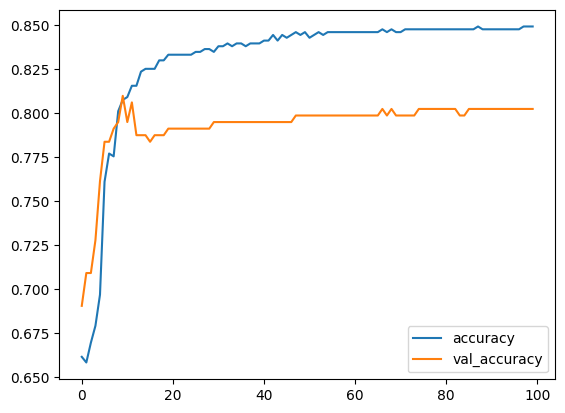

In [ ]:
# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['accuracy','val_accuracy']].plot()

## REPETINDO O EXPERIMENTO, AGORA, SEM A PRESENÇA DE "CABIN"


In [ ]:
df_re_teste = df_re_teste.drop(["Cabin"],axis=1)

In [ ]:
df_re_teste.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [ ]:
#Transformando a coluna "Sex" em numérico (note que,
# devido a natureza da coluna, seus dados se comportarão
# de forma binária).
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[["Sex"]] = \
df[["Sex"]].apply(labelencoder.fit_transform)

In [ ]:
df_re_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   Pclass_1    891 non-null    uint8  
 10  Pclass_2    891 non-null    uint8  
 11  Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(6)
memory usage: 47.1+ KB


In [ ]:
df_re_teste

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,female,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,male,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,0,0,1,0,1,0
887,1,female,19.0,0,0,30.0000,0,0,1,1,0,0
888,0,female,28.0,1,2,23.4500,0,0,1,0,0,1
889,1,male,26.0,0,0,30.0000,1,0,0,1,0,0


In [ ]:
#mulheres = 0 ; homens = 1
df_re_teste["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Normalização de Age e Fare, que possuem discrepância alta em distribuição de dados.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_re_teste[['Age', 'Fare']] = scaler.fit_transform(df_re_teste[['Age', 'Fare']])

In [ ]:
df_re_teste

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,male,0.271174,1,0,0.014151,0,0,1,0,0,1
1,1,female,0.472229,1,0,0.139136,1,0,0,1,0,0
2,1,female,0.321438,0,0,0.015469,0,0,1,0,0,1
3,1,female,0.434531,1,0,0.103644,0,0,1,1,0,0
4,0,male,0.434531,0,0,0.015713,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,0.334004,0,0,0.025374,0,0,1,0,1,0
887,1,female,0.233476,0,0,0.058556,0,0,1,1,0,0
888,0,female,0.346569,1,2,0.045771,0,0,1,0,0,1
889,1,male,0.321438,0,0,0.058556,1,0,0,1,0,0


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# Aplicar balanceamento nas classes usando SMOTE
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_train_oversampled.shape)
print(X_train.shape)

(750, 19)
(623, 19)


## Rede Neural (Scikit) - 2 camadas


Observação: dentre os classificadores, nos testes, a rede neural por Scikit com duas camadas se saiu melhor no geral.

In [ ]:
rnaf = MLPClassifier(hidden_layer_sizes=(3,3), activation='relu', solver='sgd', max_iter =1000,
                              tol=0.0001, random_state = 3, verbose = True)

In [ ]:
rnaf.fit(X_train_oversampled, y_train_oversampled)

Iteration 1, loss = 0.81059396
Iteration 2, loss = 0.80947781
Iteration 3, loss = 0.80772490
Iteration 4, loss = 0.80559245
Iteration 5, loss = 0.80320885
Iteration 6, loss = 0.80073822
Iteration 7, loss = 0.79831709
Iteration 8, loss = 0.79566829
Iteration 9, loss = 0.79314901
Iteration 10, loss = 0.79052377
Iteration 11, loss = 0.78798018
Iteration 12, loss = 0.78545524
Iteration 13, loss = 0.78303482
Iteration 14, loss = 0.78061982
Iteration 15, loss = 0.77815844
Iteration 16, loss = 0.77580966
Iteration 17, loss = 0.77367297
Iteration 18, loss = 0.77137954
Iteration 19, loss = 0.76915508
Iteration 20, loss = 0.76697622
Iteration 21, loss = 0.76479181
Iteration 22, loss = 0.76276593
Iteration 23, loss = 0.76074046
Iteration 24, loss = 0.75882433
Iteration 25, loss = 0.75680439
Iteration 26, loss = 0.75495299
Iteration 27, loss = 0.75304353
Iteration 28, loss = 0.75133965
Iteration 29, loss = 0.74941787
Iteration 30, loss = 0.74775859
Iteration 31, loss = 0.74598920
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=1000, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoesf = rnaf.predict(X_test)

In [ ]:
rnaf_teste = accuracy_score(y_test, previsoesf)

In [ ]:
print(rnaf_teste)

0.7947761194029851


In [ ]:
cm_rnaf_teste = confusion_matrix(y_test, previsoesf)

In [ ]:
print(classification_report(y_test, previsoesf))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       174
           1       0.73      0.66      0.69        94

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
previsoes_treinof = rnaf.predict(X_train_oversampled)

In [ ]:
rnaf_treino = accuracy_score(y_train_oversampled, previsoes_treinof)

In [ ]:
cm_rnaf_treino = confusion_matrix(y_train_oversampled, previsoes_treinof)

GridSearch

In [ ]:
# Grid Search
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

g_search = GridSearchCV(estimator=rnaf, param_grid=param_grid, cv=10)
g_search.fit(X_train_oversampled, y_train_oversampled)

best_params_gridf = g_search.best_params_
best_score_gridf = g_search.best_score_

print("Melhores hiperparâmetros encontrados através do Grid Search:")
print(best_params_gridf)
print("Melhor pontuação (acurácia) encontrada através do Grid Search:", best_score_gridf)


A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 205, loss = 0.62486398
Iteration 206, loss = 0.62407569
Iteration 207, loss = 0.62327356
Iteration 208, loss = 0.62245669
Iteration 209, loss = 0.62167399
Iteration 210, loss = 0.62088268
Iteration 211, loss = 0.62012609
Iteration 212, loss = 0.61929912
Iteration 213, loss = 0.61850635
Iteration 214, loss = 0.61776799
Iteration 215, loss = 0.61693847
Iteration 216, loss = 0.61612989
Iteration 217, loss = 0.61533264
Iteration 218, loss = 0.61452399
Iteration 219, loss = 0.61371583
Iteration 220, loss = 0.61295434
Iteration 221, loss = 0.61211752
Iteration 222, loss = 0.61134373
Iteration 223, loss = 0.61051655
Iteration 224, loss = 0.60971689
Iteration 225, loss = 0.60892812
Iteration 226, loss = 0.60808444
Iteration 227, loss = 0.60725820
Iteration 228, loss = 0.60644400
Iteration 229, loss = 0.60564659
Iteration 230, loss = 0.60478509
Iteration 231, loss = 0.60394986
Iteration 232, loss = 0.60314434
Iteration 233, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rnaf_best_grid = MLPClassifier(**best_params_gridf)
rnaf_best_grid.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Grid Search
pred_gridf = rnaf_best_grid.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_grid = accuracy_score(y_test, pred_gridf)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search:", accuracy_grid)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Grid Search: 0.7798507462686567


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Grid Search
print("Matriz de Confusão - Grid Search")
cm_rnaf_grid = confusion_matrix(y_test, pred_gridf)

Matriz de Confusão - Grid Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rnaf_grid = g_results.loc[g_search.best_index_,'mean_test_score']

RandomSearch

In [ ]:
# Random Search
param_dist = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'max_iter': [1000, 2000],
    'tol': [0.0001, 0.001],
}

r_search = RandomizedSearchCV(estimator=rnaf, param_distributions=param_dist, cv=10)
r_search.fit(X_train_oversampled, y_train_oversampled)

best_params_random = r_search.best_params_
best_score_random = r_search.best_score_

print("Melhores hiperparâmetros encontrados através do Random Search:")
print(best_params_random)
print("Melhor pontuação (acurácia) encontrada através do Random Search:", best_score_random)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 137, loss = 0.68918127
Iteration 138, loss = 0.68901808
Iteration 139, loss = 0.68886153
Iteration 140, loss = 0.68871136
Iteration 141, loss = 0.68856991
Iteration 142, loss = 0.68840118
Iteration 143, loss = 0.68828110
Iteration 144, loss = 0.68810656
Iteration 145, loss = 0.68797346
Iteration 146, loss = 0.68781834
Iteration 147, loss = 0.68766971
Iteration 148, loss = 0.68753823
Iteration 149, loss = 0.68739415
Iteration 150, loss = 0.68724666
Iteration 151, loss = 0.68709454
Iteration 152, loss = 0.68696186
Iteration 153, loss = 0.68683596
Iteration 154, loss = 0.68666633
Iteration 155, loss = 0.68653518
Iteration 156, loss = 0.68637973
Iteration 157, loss = 0.68624639
Iteration 158, loss = 0.68609754
Iteration 159, loss = 0.68595364
Iteration 160, loss = 0.68582855
Iteration 161, loss = 0.68565229
Iteration 162, loss = 0.68551819
Iteration 163, loss = 0.68537397
Iteration 164, loss = 0.68522941
Iteration 165, lo

In [ ]:
# Ajuste do modelo MLP aos dados de treinamento
rnaf_best_random = MLPClassifier(**best_params_random)
rnaf_best_random.fit(X_train_oversampled, y_train_oversampled)

# Predições nos dados de teste usando o modelo com melhores hiperparâmetros encontrados pelo Random Search
pred_randomf = rnaf_best_random.predict(X_test)

In [ ]:
# Cálculo e impressão da acurácia nos dados de teste
accuracy_random = accuracy_score(y_test, pred_randomf)
print("Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search:", accuracy_random)

Acurácia do modelo MLP com melhores hiperparâmetros pelo Random Search: 0.7835820895522388


In [ ]:
# Matriz de confusão para o modelo com melhores hiperparâmetros pelo Random Search
print("Matriz de Confusão - Random Search")
cm_rnaf_random = confusion_matrix(y_test, pred_randomf)

Matriz de Confusão - Random Search


In [ ]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
rnaf_random = r_results.loc[r_search.best_index_,'mean_test_score']

## RESULTADOS


In [ ]:
#Resultados dos classificadores:

print("EXPERIMENTO COM AS CABINES: ")
print("********************************")
print("ACURACIAS COM DECISION TREE:")
print("Acuracia bruta -", accuracy_tree)
print("GridSearch -", Acurácias_Tree_Grid)
print("RandomSearch -", Acurácias_Tree_Random)
print("Matriz confusao:")
print(confusion_tree)
print("---------------------------------------")
print("ACURACIAS COM KNN:")
print("Acuracia bruta -", acuracia_knn)
print("GridSearch -", knn_grid)
print("RandomSearch -", knn_random)
print("Matriz confusao:")
print(cm_knn)
print("---------------------------------------")
print("ACURACIAS COM RANDOM FOREST:")
print("Acuracia bruta -", accuracy_tree)
print("GridSearch -", forest_grid)
print("RandomSearch -", forest_random)
print("Matriz confusao:")
print(cm_forest)
print("---------------------------------------")
print("ACURACIAS COM REDE NEURAL (Scikit) - 1 camada:")
print("Acuracia bruta teste -", rna_teste)
print("Matriz confusão do teste:")
print(cm_rna_teste)
print("Acuracia bruta treino -", rna_treino)
print("Matriz confusão do treino:")
print(cm_rna_treino)
print("GridSearch -", rna1_grid)
print("Matriz confusão do GridSearch:")
print(cm_rna_grid)
print("RandomSearch -", rna1_random)
print("Matriz confusão do RandomSearch:")
print(cm_rna_random)
print("---------------------------------------")
print("ACURACIAS COM REDE NEURAL (Scikit) - 2 camadas:")
print("Acuracia bruta teste -", rna2_teste)
print("Matriz confusão do teste:")
print(cm_rna2_teste)
print("Acuracia bruta treino -", rna2_treino)
print("Matriz confusão do treino:")
print(cm_rna2_treino)
print("GridSearch -", rna2_grid)
print("Matriz confusão do GridSearch:")
print(cm_rna2_grid)
print("RandomSearch -", rna2_random)
print("Matriz confusão do RandomSearch:")
print(cm_rna2_random)
print("---------------------------------------")
print("ACURACIAS COM REDE NEURAL (Scikit) - 3 camadas:")
print("Acuracia bruta teste -", rna3_teste)
print("Matriz confusão do teste:")
print(cm_rna3_teste)
print("Acuracia bruta treino -", rna3_treino)
print("Matriz confusão do treino:")
print(cm_rna3_treino)
print("GridSearch -", rna3_grid)
print("Matriz confusão do GridSearch:")
print(cm_rna3_grid)
print("RandomSearch -", rna3_random)
print("Matriz confusão do RandomSearch:")
print(cm_rna3_random)
print("---------------------------------------")
print("ACURACIAS COM REDE NEURAL Keras:")
print("Acuracia -", acuracia_keras)
print("---------------------------------------")
print("EXPERIMENTO SEM AS CABINES: ")
print("********************************")
print("---------------------------------------")
print("ACURACIAS COM REDE NEURAL (Scikit) - 2 camadas:")
print("Acuracia bruta teste -", rnaf_teste)
print("Matriz confusão do teste:")
print(cm_rnaf_teste)
print("Acuracia bruta treino -", rnaf_treino)
print("Matriz confusão do treino:")
print(cm_rnaf_treino)
print("GridSearch -", rnaf_grid)
print("Matriz confusão do GridSearch:")
print(cm_rnaf_grid)
print("RandomSearch -", rnaf_random)
print("Matriz confusão do RandomSearch:")
print(cm_rnaf_random)

EXPERIMENTO COM AS CABINES: 
********************************
ACURACIAS COM DECISION TREE:
Acuracia bruta - 0.7649253731343284
GridSearch - 0.8355263157894737
RandomSearch - 0.8263157894736841
Matriz confusao:
[[141  28]
 [ 35  64]]
---------------------------------------
ACURACIAS COM KNN:
Acuracia bruta - 0.7126865671641791
GridSearch - 0.8355263157894737
RandomSearch - 0.8342105263157894
Matriz confusao:
[[128  41]
 [ 36  63]]
---------------------------------------
ACURACIAS COM RANDOM FOREST:
Acuracia bruta - 0.7649253731343284
GridSearch - 0.843421052631579
RandomSearch - 0.8328947368421054
Matriz confusao:
[[141  28]
 [ 35  64]]
---------------------------------------
ACURACIAS COM REDE NEURAL (Scikit) - 1 camada:
Acuracia bruta teste - 0.7276119402985075
Matriz confusão do teste:
[[124  45]
 [ 28  71]]
Acuracia bruta treino - 0.8105263157894737
Matriz confusão do treino:
[[313  67]
 [ 77 303]]
GridSearch - 0.8355263157894738
Matriz confusão do GridSearch:
[[139  30]
 [ 33  66]]